# Preliminary binary classification of lowcov and highcov aDNA samples ($n=10+15$)

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

## Summary of data

### Summary of TP/FP counts
| Types      | Counts |
| ----------- | ----------- |
| Total      | 22540       |
| TP (Alu/L1/SVA)   |  10041     |
| TP (Alu)       |  2410    |
| FP        | 12500    |

### Summary of number of features
| Types      | Counts |
| ------------ | ------ |
| Raw       | 20    |
| After preprocessing | 15   |

## Read in data and clean data

Only Alu related features are contained in the input.

have a chart of feature counts, feature selected, for which model

In [50]:
df = pd.read_csv("./data/Alu.impute.out", sep="\t")
df.rename(columns={"15": "TE_start"}, inplace=True)
df.head(10)

,#chr,pos,TE_chr,TE_start,TE_family,TE_length,nearby_sites,lclip,rclip,cr_Alu,...,ratio_rcluster,dr_Alu,longest_clip_len,l_cov,r_cov,polyA,cns_std_l_polyA,cns_std_r_polyA,ratio_low_MAPQ,clip_pos_std
0,chr1,185707445,chr1,185707445,SINE/Alu:AluYg6,600,0,8,8,0,...,0.0,0,29,8.74,12.28,4,0,2,0.000000,0.00
1,chr1,49644869,.,14,.,-1,1,2,0,0,...,0.0,0,42,53.20,65.00,0,1,0,0.000000,13.94
2,chr1,224583725,chr1,224583725,SINE/Alu:AluYe5,298,0,0,6,0,...,0.0,0,18,10.12,4.56,0,0,0,0.000000,0.00
3,chr1,199204290,.,14,.,-1,2,0,2,0,...,0.0,0,0,83.44,27.16,0,0,0,0.000000,17.19
4,chr1,33061051,.,14,.,-1,3,2,0,0,...,0.0,0,37,80.92,75.96,0,0,1,0.000000,15.24
5,chr1,17996840,.,14,.,-1,6,2,2,0,...,0.0,0,27,60.04,62.84,0,0,0,0.000000,12.48
6,chr1,243498092,.,14,.,-1,1,0,2,0,...,0.0,0,0,4.16,6.24,0,0,0,0.000000,17.06
7,chr1,184399773,.,14,.,-1,1,2,0,2,...,1.0,0,35,46.04,55.76,0,1,0,0.246988,9.90
8,chr1,35075374,.,14,.,-1,3,0,2,0,...,0.0,0,38,71.80,33.86,0,0,4,0.074627,14.37
9,chr1,93901708,.,14,.,-1,0,0,2,0,...,0.0,0,19,8.90,4.76,0,0,2,0.000000,0.00


### Drop L1/SVA features and other info useless to classification

Here we define negative set as sites without Alu, L1, or SVA gold std set insertions.

In [51]:
df['TE_ins'] = np.where(df['TE_family']!= '.', 1, 0)
df = df.drop(["#chr", "pos", "TE_chr", "TE_start", "TE_family", "TE_length"], axis=1)
df.head()

,nearby_sites,lclip,rclip,cr_Alu,cns_Alu,raw_ldisc,raw_rdisc,ldisc_Alu,rdisc_Alu,ratio_lcluster,...,dr_Alu,longest_clip_len,l_cov,r_cov,polyA,cns_std_l_polyA,cns_std_r_polyA,ratio_low_MAPQ,clip_pos_std,TE_ins
0,0,8,8,0,10,0,0,0,0,0.0,...,0,29,8.74,12.28,4,0,2,0.0,0.00,1
1,1,2,0,0,0,0,0,0,0,0.0,...,0,42,53.20,65.00,0,1,0,0.0,13.94,0
2,0,0,6,0,6,0,0,0,0,0.0,...,0,18,10.12,4.56,0,0,0,0.0,0.00,1
3,2,0,2,0,0,0,0,0,0,0.0,...,0,0,83.44,27.16,0,0,0,0.0,17.19,0
4,3,2,0,0,0,0,0,0,0,0.0,...,0,37,80.92,75.96,0,0,1,0.0,15.24,0


### Assess colinearity of related features and deal with missing values in `clip_pos_std`

Related features:

rclip, raw_ldisc, l_disc_Alu

lclip, raw_rdisc, r_disc_Alu

polyA, cns_std_l_polyA, cns_std_r_polyA

lclip/rclip, cr_Alu, cns_Alu

raw_ldisc, raw_rdisc, dr_Alu

# Look into statistical feature selection, PCA top-n PCs, instead of looking them closely

<Figure size 432x288 with 0 Axes>

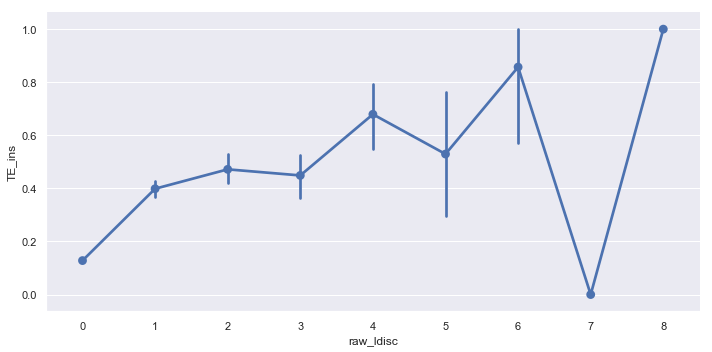

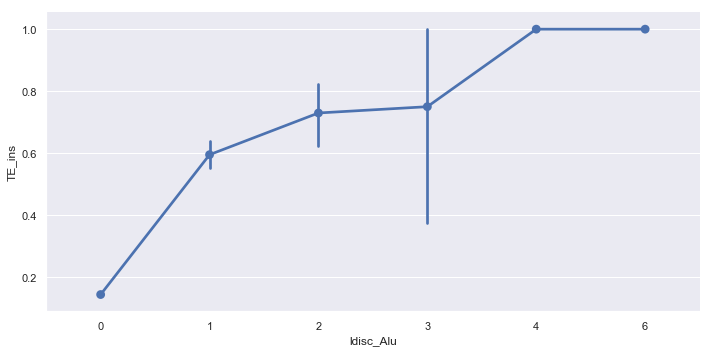

In [52]:
for i, col in enumerate(['raw_ldisc', 'ldisc_Alu']):
    plt.figure(i)
    sns.catplot(x=col, y='TE_ins', data=df, kind='point', aspect=2, )

<Figure size 432x288 with 0 Axes>

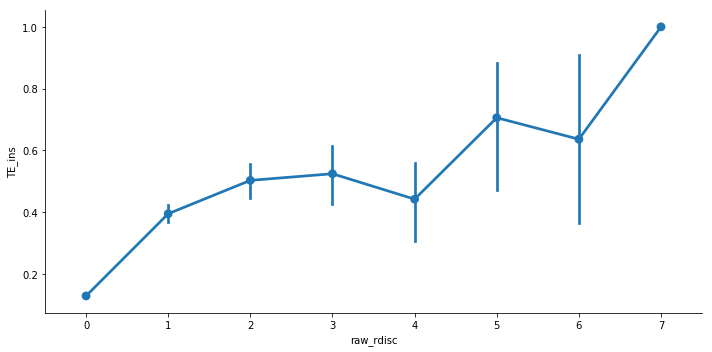

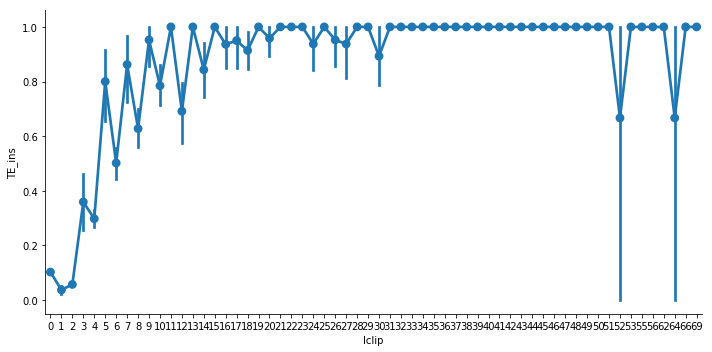

In [11]:
for i, col in enumerate(['raw_rdisc', 'lclip']):
    plt.figure(i)
    sns.catplot(x=col, y='TE_ins', data=df, kind='point', aspect=2, )

<Figure size 432x288 with 0 Axes>

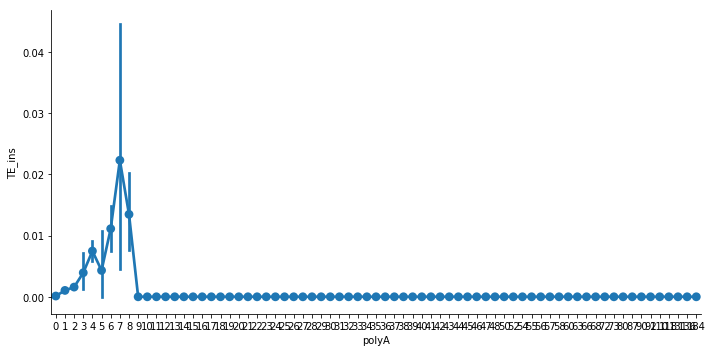

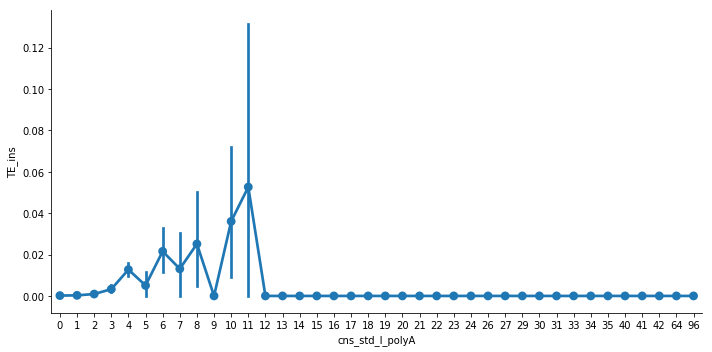

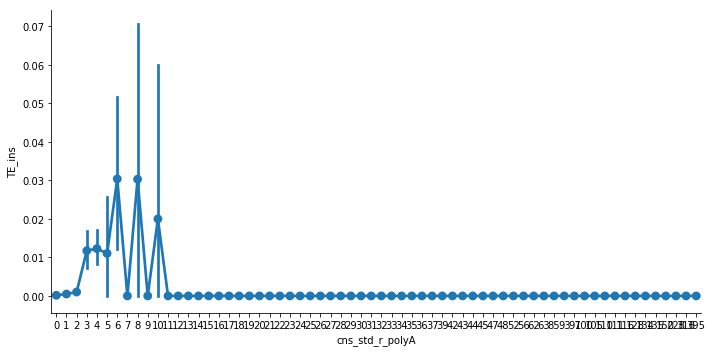

In [7]:
for i, col in enumerate(['polyA', 'cns_std_l_polyA', 'cns_std_r_polyA']):
    plt.figure(i)
    sns.catplot(x=col, y='TE_ins', data=df, kind='point', aspect=2, )

<Figure size 432x288 with 0 Axes>

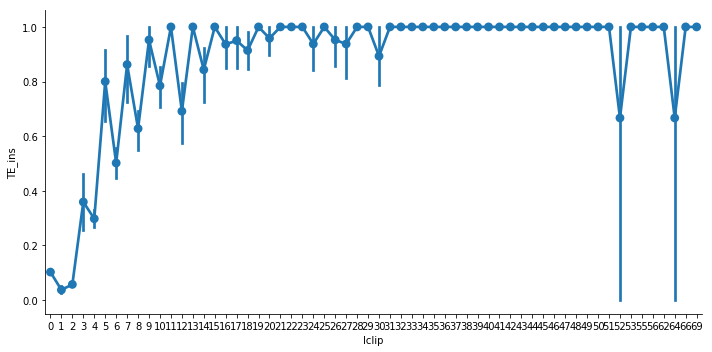

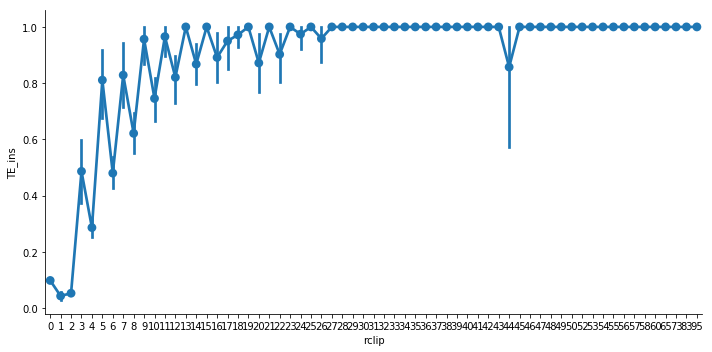

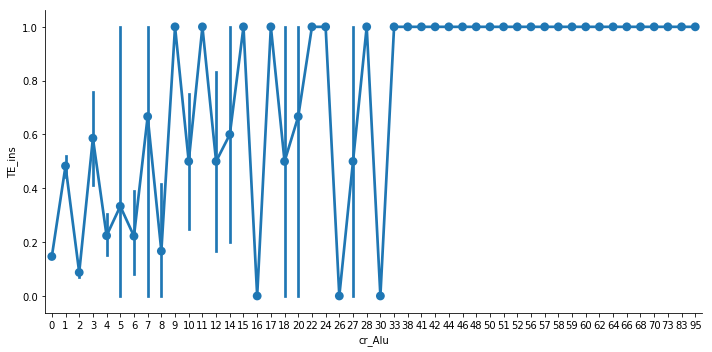

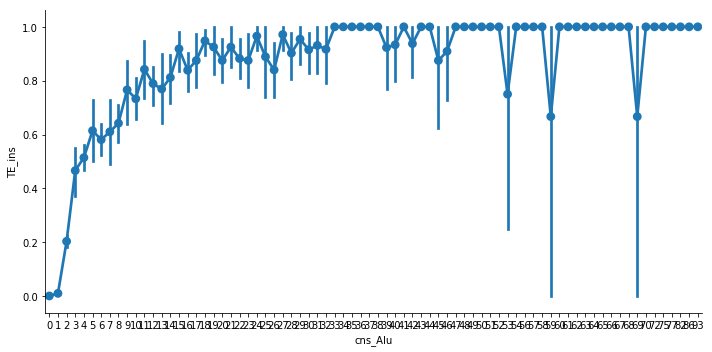

In [12]:
for i, col in enumerate(['lclip', 'rclip', 'cr_Alu', "cns_Alu"]):
    plt.figure(i)
    sns.catplot(x=col, y='TE_ins', data=df, kind='point', aspect=2, )

In [13]:
lclip_rclip_corr = df["lclip"].corr(df["rclip"])
lclip_cr_Alu_corr = df["lclip"].corr(df["cr_Alu"])
lclip_cns_Alu_corr = df["lclip"].corr(df["cns_Alu"])

print(f"Correlation coefficient between lclip and rclip is {np.round(lclip_rclip_corr,2)}")
print(f"Correlation coefficient between lclip and cr_Alu is {np.round(lclip_cr_Alu_corr,2)}")
print(f"Correlation coefficient between lclip and cns_Alu is {np.round(lclip_cns_Alu_corr,2)}")

Correlation coefficient between lclip and rclip is 0.23
Correlation coefficient between lclip and cr_Alu is 0.14
Correlation coefficient between lclip and cns_Alu is 0.7


Just to see the Pearson correlation coefficient between different columns in general (no normalization necessary).

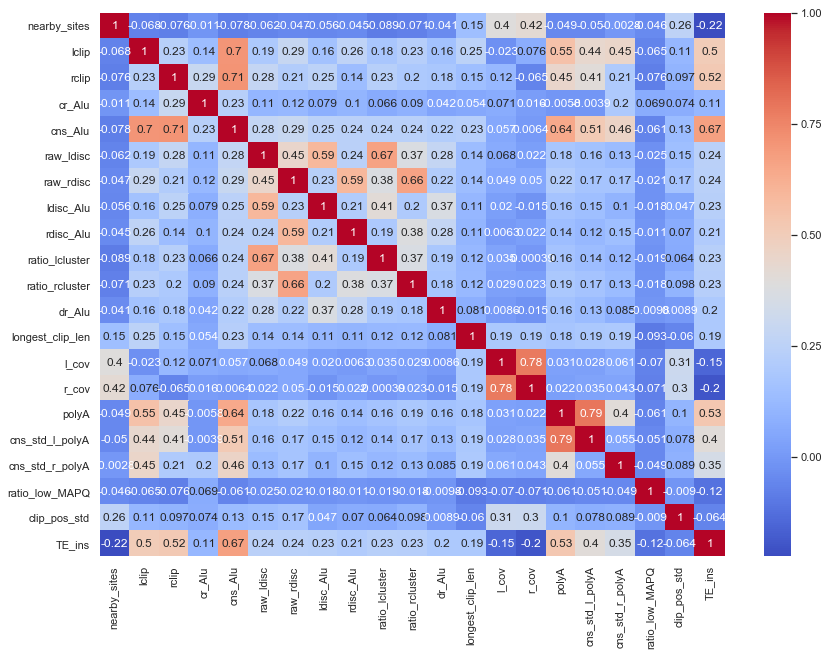

In [22]:
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='coolwarm')

### Conclusion:

1. `ldisc` and `ldisc_Alu` are highly correlated in their predictive power of TE insertions. The easiest way to resolve this is to use only `ldisc_Alu`. Similarly (trend plotted but not shown here), we use only `rdisc_Alu`.

2. `lclip` and `raw_rdisc` are not as correlated in their predictive power of TE insertions. We can keep them both.

3. `polyA` presents duplicate information as `cns_std_l_polyA` and `cns_std_r_polyA`. It is better to drop `polyA`.

4. `lclip`, `rclip` have similar trends as `cr_Alu`, but not `cns_Alu`. However, the columns are quite correlated with one another, so it is better to normalize `cr_Alu` and `cns_Alu` with the sum of `lclip` and `rclip`.

5. `dr_Alu` are quite correlated with `raw_ldisc` and `raw_rdisc`, so it is better to normalize `dr_Alu` with the sum of `raw_ldisc` and `raw_rdisc`.

6. `ratio_lcluster` are quite correlated with `raw_ldisc` and `ratio_rcluster` are quite correlated with `raw_rdisc`. Need to double check after normalization steps.

In [53]:
features_norm = df.drop(['lclip', 'rclip', 'cr_Alu', 'cns_Alu', 'raw_ldisc', 'raw_rdisc', 'ldisc_Alu', 'rdisc_Alu', 'dr_Alu', 
                         'l_cov', 'r_cov', 'polyA', 'cns_std_l_polyA', 'cns_std_r_polyA'], axis=1)
labels = df['TE_ins'] # change this to TE_family?
features_norm['lclip'] = np.where(df['l_cov']>0, df['lclip']/df['l_cov'], 0)
features_norm['rclip'] = np.where(df['r_cov']>0, df['rclip']/df['r_cov'], 0)
features_norm['cr_Alu'] = np.where(df['lclip']+df['rclip']>0, df['cr_Alu']/(df['lclip']+df['rclip']), 0)
features_norm['cns_Alu'] = np.where(df['lclip']+df['rclip']>0, df['cns_Alu']/(df['lclip']+df['rclip']), 0)
features_norm['ldisc_Alu'] = np.where(df['r_cov']>0, df['ldisc_Alu']/df['r_cov'], 0)
features_norm['rdisc_Alu'] = np.where(df['l_cov']>0, df['rdisc_Alu']/df['l_cov'], 0)
features_norm['dr_Alu'] = np.where(df['raw_ldisc']+df['raw_rdisc']>0, df['dr_Alu']/(df['raw_ldisc']+df['raw_rdisc']), 0)
features_norm['cns_std_l_polyA'] = np.where(df['l_cov']>0, df['cns_std_l_polyA']/df['l_cov'], 0)
features_norm['cns_std_r_polyA'] = np.where(df['r_cov']>0, df['cns_std_r_polyA']/df['r_cov'], 0)
features_norm.head()

,nearby_sites,ratio_lcluster,ratio_rcluster,longest_clip_len,ratio_low_MAPQ,clip_pos_std,TE_ins,lclip,rclip,cr_Alu,cns_Alu,ldisc_Alu,rdisc_Alu,dr_Alu,cns_std_l_polyA,cns_std_r_polyA
0,0,0.0,0.0,29,0.0,0.00,1,0.915332,0.651466,0.0,0.625,0.0,0.0,0.0,0.000000,0.162866
1,1,0.0,0.0,42,0.0,13.94,0,0.037594,0.000000,0.0,0.000,0.0,0.0,0.0,0.018797,0.000000
2,0,0.0,0.0,18,0.0,0.00,1,0.000000,1.315789,0.0,1.000,0.0,0.0,0.0,0.000000,0.000000
3,2,0.0,0.0,0,0.0,17.19,0,0.000000,0.073638,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000
4,3,0.0,0.0,37,0.0,15.24,0,0.024716,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.013165


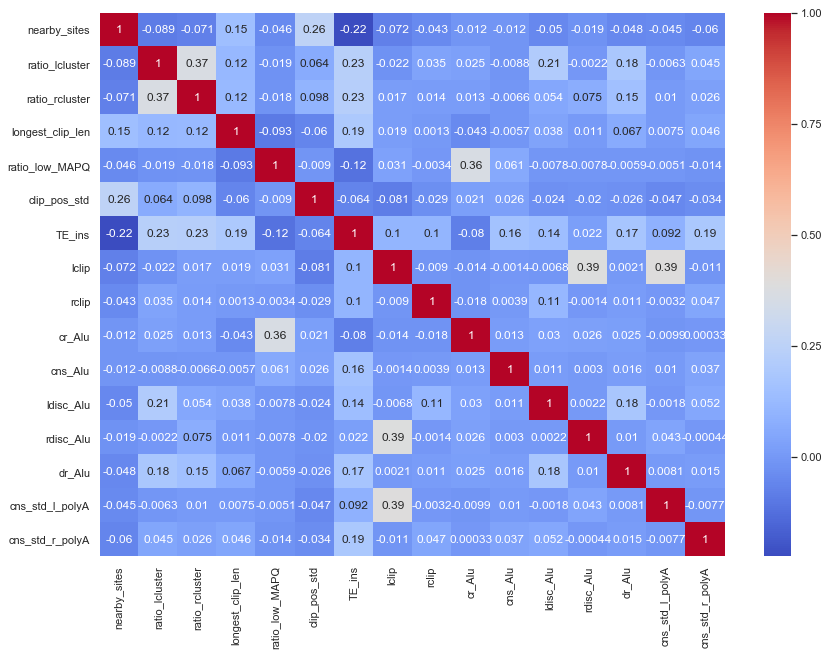

In [26]:
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(features_norm.corr(), annot=True, fmt='.2g', cmap='coolwarm')

### Write out cleaned data

In [54]:
features_norm.to_csv('./data/Alu_cleaned.tsv', index=False, sep='\t', header=True)

## Split data into train, validation, and test set

By the ratio of $60\%$, $20\%$, $20\%$.

In [55]:
features = features_norm.drop('TE_ins', axis=1)
labels = features_norm['TE_ins']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [56]:
X_train.to_csv('./data/Alu_train_features.csv', index=False)
X_val.to_csv('./data/Alu_val_features.csv', index=False)
X_test.to_csv('./data/Alu_test_features.csv', index=False)

y_train.to_csv('./data/Alu_train_labels.csv', index=False)
y_val.to_csv('./data/Alu_val_labels.csv', index=False)
y_test.to_csv('./data/Alu_test_labels.csv', index=False)

## Logistic Regression

In [30]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = X_train # will need to fix mixed data type in column 0
tr_labels = y_train

Use 5-fold cross validation to pick the best hyperparameter (The larger $C$ is, the lower the regularization.)

In [31]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [34]:
lr = LogisticRegression(max_iter=500)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 5000, 10000]
}

cv = GridSearchCV(lr, parameters, cv=5, scoring='balanced_accuracy')
cv.fit(tr_features, tr_labels.values.ravel()) #.values.ravel() converts a pandas series into an array

print_results(cv)
cv.best_estimator_

BEST PARAMS: {'C': 500}

0.544 (+/-0.008) for {'C': 0.001}
0.602 (+/-0.023) for {'C': 0.01}
0.655 (+/-0.022) for {'C': 0.1}
0.672 (+/-0.02) for {'C': 1}
0.678 (+/-0.02) for {'C': 10}
0.682 (+/-0.019) for {'C': 100}
0.683 (+/-0.018) for {'C': 500}
0.683 (+/-0.019) for {'C': 1000}
0.682 (+/-0.02) for {'C': 5000}
0.682 (+/-0.019) for {'C': 10000}


LogisticRegression(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
joblib.dump(cv.best_estimator_, './models/Alu_LR_model.pkl')

['Alu_LR_model.pkl']

## Multilayer Perceptron

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5, scoring='balanced_accuracy')
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)
cv.best_estimator_

C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}

0.912 (+/-0.017) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.911 (+/-0.044) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.917 (+/-0.042) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.93 (+/-0.02) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.935 (+/-0.022) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.939 (+/-0.017) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.942 (+/-0.011) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.929 (+/-0.036) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.936 (+/-0.018) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning

C:\Users\97841\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
joblib.dump(cv.best_estimator_, './models/Alu_MLP_model.pkl')

['Alu_MLP_model.pkl']

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5, scoring='balanced_accuracy')
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 50}

0.608 (+/-0.034) for {'max_depth': 2, 'n_estimators': 5}
0.674 (+/-0.026) for {'max_depth': 2, 'n_estimators': 50}
0.657 (+/-0.014) for {'max_depth': 2, 'n_estimators': 250}
0.849 (+/-0.043) for {'max_depth': 4, 'n_estimators': 5}
0.877 (+/-0.019) for {'max_depth': 4, 'n_estimators': 50}
0.876 (+/-0.023) for {'max_depth': 4, 'n_estimators': 250}
0.92 (+/-0.021) for {'max_depth': 8, 'n_estimators': 5}
0.929 (+/-0.01) for {'max_depth': 8, 'n_estimators': 50}
0.929 (+/-0.013) for {'max_depth': 8, 'n_estimators': 250}
0.937 (+/-0.019) for {'max_depth': 16, 'n_estimators': 5}
0.946 (+/-0.013) for {'max_depth': 16, 'n_estimators': 50}
0.945 (+/-0.011) for {'max_depth': 16, 'n_estimators': 250}
0.937 (+/-0.015) for {'max_depth': 32, 'n_estimators': 5}
0.944 (+/-0.015) for {'max_depth': 32, 'n_estimators': 50}
0.944 (+/-0.009) for {'max_depth': 32, 'n_estimators': 250}
0.937 (+/-0.015) for {'max_depth': None, 'n_estimators': 5}
0.943 (+/-0.01

In [41]:
joblib.dump(cv.best_estimator_, './models/Alu_RF_model.pkl')

['Alu_RF_model.pkl']

## Boosted Tree

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5, scoring='balanced_accuracy')
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}

0.5 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.5 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.744 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.876 (+/-0.024) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.5 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.501 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.917 (+/-0.019) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.933 (+/-0.013) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.5 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.504 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.93 (+/-0.012) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.943 (+/-0.014) for {'learning_rate': 0.01, 'max_

In [44]:
joblib.dump(cv.best_estimator_, './models/Alu_GB_model.pkl')

['Alu_GB_model.pkl']

## Evaluate trained models on validation data and test data

Evaluate all saved models on validation data and select the best model and evaluate the test balanced accuracy.

In [45]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score
from time import time

### Read in models

In [57]:
models = {}

for mdl in ['LR', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('./models/Alu_{}_model.pkl'.format(mdl))
models

{'LR': LogisticRegression(C=500, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=500, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 'MLP': MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(50,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
        random_state=None, shuffle=True, solver='adam', tol=0.0001,
        validation_fraction=0.1, verbose=False, warm_start=False),
 'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=16, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sa

In [47]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    bal_accuracy = round(balanced_accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Balanced Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   bal_accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Balanced Accuracy: 0.686 / Precision: 0.674 / Recall: 0.408 / Latency: 45.5ms
MLP -- Balanced Accuracy: 0.942 / Precision: 0.9 / Recall: 0.902 / Latency: 14.0ms
RF -- Balanced Accuracy: 0.947 / Precision: 0.948 / Recall: 0.902 / Latency: 26.6ms
GB -- Balanced Accuracy: 0.957 / Precision: 0.955 / Recall: 0.922 / Latency: 18.4ms


### Evaluate models on test set

In [48]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, y_test)

LR -- Balanced Accuracy: 0.69 / Precision: 0.738 / Recall: 0.406 / Latency: 4.0ms
MLP -- Balanced Accuracy: 0.936 / Precision: 0.906 / Recall: 0.889 / Latency: 7.0ms
RF -- Balanced Accuracy: 0.951 / Precision: 0.948 / Recall: 0.91 / Latency: 17.0ms
GB -- Balanced Accuracy: 0.957 / Precision: 0.944 / Recall: 0.924 / Latency: 15.0ms


## Conclusion:

Gradient boosted trees have the best balanced accuracy, precision, and recall. Use this model!

## Sanity check: randomly shuffle the training data and check the balanced accuracy

In [59]:
shuffled_y_test = y_test.sample(frac=1).reset_index(drop=True)

In [60]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, shuffled_y_test)

LR -- Balanced Accuracy: 0.5 / Precision: 0.155 / Recall: 0.085 / Latency: 7.0ms
MLP -- Balanced Accuracy: 0.496 / Precision: 0.147 / Recall: 0.144 / Latency: 12.0ms
RF -- Balanced Accuracy: 0.498 / Precision: 0.15 / Recall: 0.144 / Latency: 24.0ms
GB -- Balanced Accuracy: 0.499 / Precision: 0.152 / Recall: 0.148 / Latency: 16.0ms


## Conclusion:

The models all have balanced accuracy $~0.5$, which is the same as our expectations.